<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula10a_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p datasets
!mkdir -p datasets/bitcoin

In [2]:
!wget https://gist.githubusercontent.com/Dudu197/a9a38c424fd41f82dc27ff34d8ee170f/raw/79927733065e72bbe8ab4d0a7255855e79584ae4/coin_prices.csv -P datasets/bitcoin

--2024-05-19 15:22:46--  https://gist.githubusercontent.com/Dudu197/a9a38c424fd41f82dc27ff34d8ee170f/raw/79927733065e72bbe8ab4d0a7255855e79584ae4/coin_prices.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8883805 (8.5M) [text/plain]
Saving to: ‘datasets/bitcoin/coin_prices.csv.1’

coin_prices.csv.1   100%[===================>]   8.47M  42.0MB/s    in 0.2s    

2024-05-19 15:22:46 (42.0 MB/s) - ‘datasets/bitcoin/coin_prices.csv.1’ saved [8883805/8883805]



In [3]:
import pandas as pd
import numpy as np
from tensorflow import keras

2024-05-19 15:22:48.590988: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-19 15:22:48.613269: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-19 15:22:48.938212: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
df = pd.read_csv("datasets/bitcoin/coin_prices.csv")

In [5]:
df = df[df["coin"] == "BTC"]

In [6]:
df

,Unnamed: 0,date,coin,volume,price
53,53,2021-05-13,BTC,7.852778e+10,47884.917106
154,154,2021-05-14,BTC,9.149487e+10,49997.846250
253,253,2021-05-15,BTC,5.551275e+10,50189.527235
353,353,2021-05-16,BTC,5.997922e+10,47480.816852
453,453,2021-05-17,BTC,6.306813e+10,46211.384370
...,...,...,...,...,...
90954,90954,2023-11-09,BTC,1.751828e+10,35661.036826
91054,91054,2023-11-10,BTC,3.753632e+10,36680.129620
91155,91155,2023-11-11,BTC,2.254243e+10,37338.914097
91254,91254,2023-11-12,BTC,1.390765e+10,37135.295578


In [7]:
from matplotlib import pyplot as plt

<Axes: >

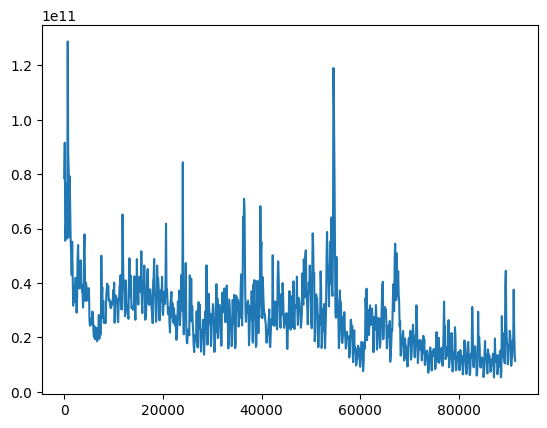

In [8]:
df["volume"].plot()

<Axes: >

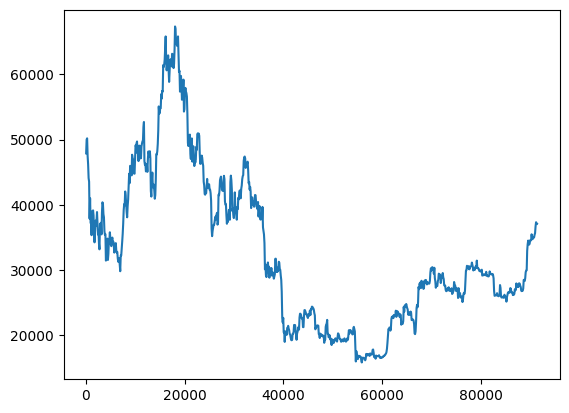

In [9]:
df["price"].plot()

In [10]:
num_train_samples = int(0.5 * len(df))
num_val_samples = int(0.25 * len(df))
num_test_samples = len(df) - num_train_samples - num_val_samples
(num_train_samples, num_val_samples, num_test_samples)

(457, 228, 229)

In [11]:
price_mean = df.iloc[:num_train_samples]["price"].mean(axis=0)
df["price"] -= price_mean
price_std = df.iloc[:num_train_samples]["price"].std(axis=0)
df["price"] /= price_std

In [12]:
volume_mean = df.iloc[:num_train_samples]["volume"].mean(axis=0)
df["volume"] -= price_mean
volume_std = df.iloc[:num_train_samples]["volume"].std(axis=0)
df["volume"] /= price_std

In [13]:
prices = df["price"].values
prices = np.concatenate([prices[1:], [prices[-1]]])
df["next_price"] = prices

In [14]:
import numpy as np
from tensorflow import keras
int_sequence = np.arange(10)
dummy_dataset = keras.utils.timeseries_dataset_from_array(
    data = df.iloc[:num_train_samples][["volume", "price"]].values,
    targets = df.iloc[:num_train_samples]["next_price"].values,
    sequence_length = 3,
    batch_size = 32,
    shuffle = True,
)
for inputs, targets in dummy_dataset:
  for i in range(inputs.shape[0]):
    print([x for x in inputs[i]])
    print(int(targets[i]))
    break

2024-05-19 15:22:57.277023: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-19 15:22:57.292932: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-19 15:22:57.293193: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-19 15:22:57.294670: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-19 15:22:57.294827: I tensorflow/compile

[<tf.Tensor: shape=(2,), dtype=float64, numpy=array([3.47878579e+06, 7.54700541e-01])>, <tf.Tensor: shape=(2,), dtype=float64, numpy=array([3.51753274e+06, 7.94166202e-01])>, <tf.Tensor: shape=(2,), dtype=float64, numpy=array([3.82546594e+06, 8.24136140e-01])>]
0
[<tf.Tensor: shape=(2,), dtype=float64, numpy=array([ 2.17176165e+06, -4.20681627e-02])>, <tf.Tensor: shape=(2,), dtype=float64, numpy=array([1.93393764e+06, 3.12999924e-03])>, <tf.Tensor: shape=(2,), dtype=float64, numpy=array([ 1.50110419e+06, -6.67977146e-03])>]
0
[<tf.Tensor: shape=(2,), dtype=float64, numpy=array([ 3.75919436e+06, -1.91526149e+00])>, <tf.Tensor: shape=(2,), dtype=float64, numpy=array([ 3.14409140e+06, -1.78996007e+00])>, <tf.Tensor: shape=(2,), dtype=float64, numpy=array([ 2.73491073e+06, -1.77190399e+00])>]
-1
[<tf.Tensor: shape=(2,), dtype=float64, numpy=array([2.39361882e+06, 5.90950442e-01])>, <tf.Tensor: shape=(2,), dtype=float64, numpy=array([3.74822650e+06, 1.46083297e-01])>, <tf.Tensor: shape=(2,)

In [15]:
num_train_samples

457

In [16]:
len(df)

914

In [17]:
sampling_rate = 6
sequence_length = 7
batch_size = 256
train_dataset = keras.utils.timeseries_dataset_from_array(
    data = df.iloc[:num_train_samples][["volume", "price"]].values,
    targets = df.iloc[:num_train_samples]["next_price"].values,
    sampling_rate = sampling_rate,
    sequence_length = sequence_length,
    shuffle = True,
    batch_size = batch_size)

val_index = num_train_samples + num_val_samples
val_dataset = keras.utils.timeseries_dataset_from_array(
    data = df.iloc[num_train_samples:val_index][["volume", "price"]].values,
    targets = df.iloc[num_train_samples:val_index]["next_price"].values,
    sampling_rate = sampling_rate,
    sequence_length = sequence_length,
    shuffle = True,
    batch_size = batch_size)

test_index = val_index + num_test_samples
test_dataset = keras.utils.timeseries_dataset_from_array(
    data = df.iloc[val_index:][["volume", "price"]].values,
    targets = df.iloc[val_index:]["next_price"].values,
    sampling_rate = sampling_rate,
    sequence_length = sequence_length,
    shuffle = True,
    batch_size = batch_size)

In [18]:
for samples, targets in train_dataset:
  print("samples shape", samples.shape)
  print("targets shape", targets.shape)
  break

samples shape (256, 7, 2)
targets shape (256,)


#baseline

In [19]:
def evaluate_naive_method(dataset):
  total_abs_err = 0.
  samples_seen = 0
  for samples, targets in dataset:
    preds = samples[:, -1, 1] * price_std + price_mean
    total_abs_err += np.sum(np.abs(preds - targets))
    samples_seen += samples.shape[0]
  return total_abs_err / samples_seen
print(f"Validation MAE: {evaluate_naive_method(val_dataset):.2f}")
print(f"Test MAE: {evaluate_naive_method(test_dataset):.2f}")

Validation MAE: 20234.85
Test MAE: 28684.27


#densely conected

In [20]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(sequence_length, 2))
x = layers.Flatten()(inputs)
x = layers.Dense(16, activation="relu")(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("btc_b_dense.model",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=['mae'])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data = val_dataset,
                    callbacks = callbacks)
model = keras.models.load_model("btc_b_dense.model")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10


2024-05-19 15:23:06.738042: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-05-19 15:23:06.747588: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f28909c29a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-19 15:23:06.747610: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070, Compute Capability 8.9
2024-05-19 15:23:06.750187: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-19 15:23:06.756568: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2024-05-19 15:23:06.805149: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: Permission denied
2024-05-19 15:23:06.832106: I ./t

1/2 [==============>...............] - ETA: 0s - loss: 4683061526528.0000 - mae: 2077836.5000INFO:tensorflow:Assets written to: btc_b_dense.model/assets


INFO:tensorflow:Assets written to: btc_b_dense.model/assets


2/2 [==============================] - 1s 328ms/step - loss: 4394334289920.0000 - mae: 2003889.5000 - val_loss: 2932207779840.0000 - val_mae: 1584631.3750
Epoch 2/10
1/2 [==============>...............] - ETA: 0s - loss: 3650429386752.0000 - mae: 1814476.0000INFO:tensorflow:Assets written to: btc_b_dense.model/assets


INFO:tensorflow:Assets written to: btc_b_dense.model/assets


2/2 [==============================] - 0s 208ms/step - loss: 3467958550528.0000 - mae: 1770769.5000 - val_loss: 2427245035520.0000 - val_mae: 1427592.3750
Epoch 3/10
1/2 [==============>...............] - ETA: 0s - loss: 3033749258240.0000 - mae: 1644478.1250INFO:tensorflow:Assets written to: btc_b_dense.model/assets


INFO:tensorflow:Assets written to: btc_b_dense.model/assets


2/2 [==============================] - 0s 215ms/step - loss: 2908902129664.0000 - mae: 1612648.0000 - val_loss: 2053165416448.0000 - val_mae: 1301063.5000
Epoch 4/10
1/2 [==============>...............] - ETA: 0s - loss: 2632311111680.0000 - mae: 1529856.1250INFO:tensorflow:Assets written to: btc_b_dense.model/assets


INFO:tensorflow:Assets written to: btc_b_dense.model/assets


2/2 [==============================] - 0s 206ms/step - loss: 2482285314048.0000 - mae: 1480149.6250 - val_loss: 1754583662592.0000 - val_mae: 1192913.8750
Epoch 5/10
1/2 [==============>...............] - ETA: 0s - loss: 2298581614592.0000 - mae: 1395871.8750INFO:tensorflow:Assets written to: btc_b_dense.model/assets


INFO:tensorflow:Assets written to: btc_b_dense.model/assets


2/2 [==============================] - 0s 218ms/step - loss: 2131283410944.0000 - mae: 1360826.8750 - val_loss: 1504457654272.0000 - val_mae: 1094139.0000
Epoch 6/10
1/2 [==============>...............] - ETA: 0s - loss: 1947182563328.0000 - mae: 1291249.0000INFO:tensorflow:Assets written to: btc_b_dense.model/assets


INFO:tensorflow:Assets written to: btc_b_dense.model/assets


2/2 [==============================] - 0s 203ms/step - loss: 1829033738240.0000 - mae: 1249981.3750 - val_loss: 1291593580544.0000 - val_mae: 1002313.3125
Epoch 7/10
1/2 [==============>...............] - ETA: 0s - loss: 1696402505728.0000 - mae: 1198356.8750INFO:tensorflow:Assets written to: btc_b_dense.model/assets


INFO:tensorflow:Assets written to: btc_b_dense.model/assets


2/2 [==============================] - 0s 214ms/step - loss: 1566640439296.0000 - mae: 1144600.6250 - val_loss: 1108800569344.0000 - val_mae: 915095.0000
Epoch 8/10
1/2 [==============>...............] - ETA: 0s - loss: 1424416702464.0000 - mae: 1075974.8750INFO:tensorflow:Assets written to: btc_b_dense.model/assets


INFO:tensorflow:Assets written to: btc_b_dense.model/assets


2/2 [==============================] - 0s 269ms/step - loss: 1336007458816.0000 - mae: 1045299.6875 - val_loss: 950538076160.0000 - val_mae: 833166.0000
Epoch 9/10
1/2 [==============>...............] - ETA: 0s - loss: 1204882243584.0000 - mae: 977072.2500INFO:tensorflow:Assets written to: btc_b_dense.model/assets


INFO:tensorflow:Assets written to: btc_b_dense.model/assets


2/2 [==============================] - 0s 219ms/step - loss: 1129564602368.0000 - mae: 948749.0625 - val_loss: 814691975168.0000 - val_mae: 757066.8125
Epoch 10/10
1/2 [==============>...............] - ETA: 0s - loss: 1020988030976.0000 - mae: 895028.4375INFO:tensorflow:Assets written to: btc_b_dense.model/assets


INFO:tensorflow:Assets written to: btc_b_dense.model/assets


1/1 [==============================] - 0s 72ms/step - loss: 154786037760.0000 - mae: 336984.1562
Test MAE: 336984.16


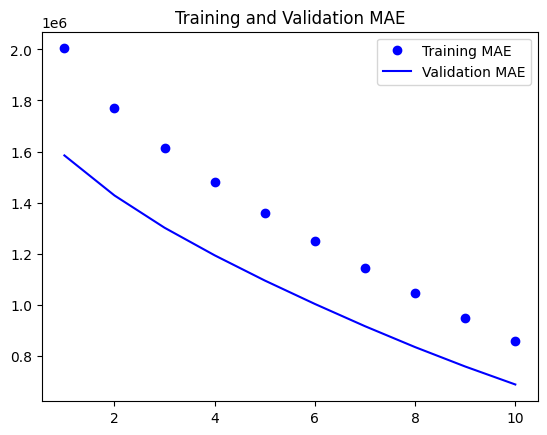

In [21]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss)+1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and Validation MAE")
plt.legend()
plt.show()

#1D convolutional model

#Rede Recorrente


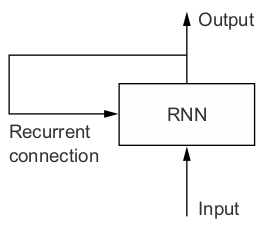

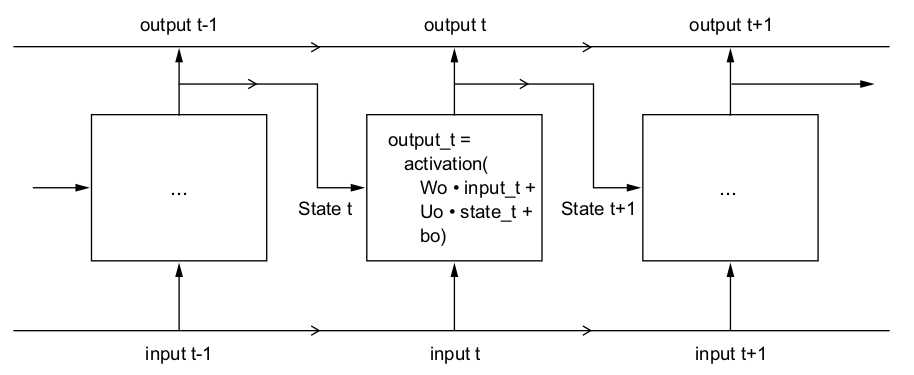

# LSTM

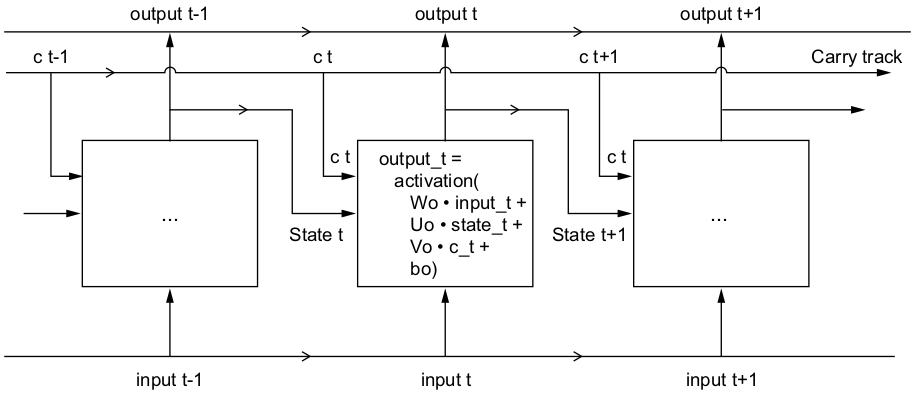

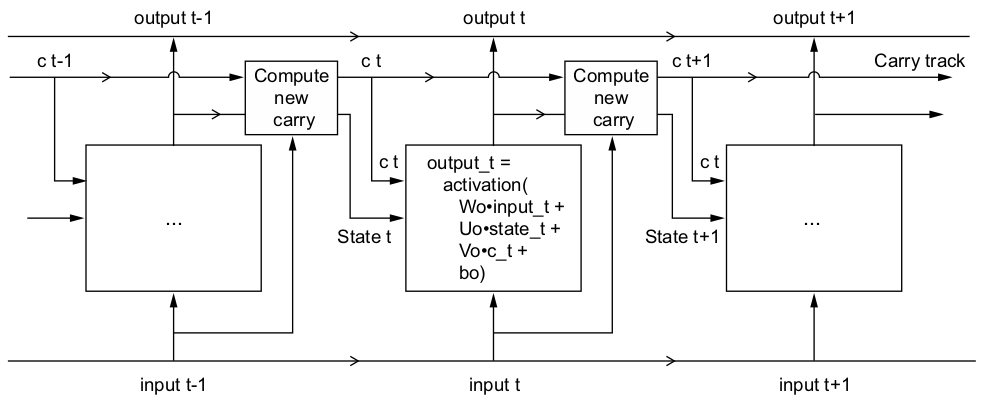

In [22]:
inputs = keras.Input(shape=(sequence_length, 2))
x = layers.LSTM(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("btc_b_lstm.model",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=['mae'])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data = val_dataset,
                    callbacks = callbacks)
model = keras.models.load_model("btc_b_lstm.model")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
1/2 [==============>...............] - ETA: 0s - loss: 1.2498 - mae: 0.8835INFO:tensorflow:Assets written to: btc_b_lstm.model/assets


INFO:tensorflow:Assets written to: btc_b_lstm.model/assets


2/2 [==============================] - 2s 1s/step - loss: 1.2536 - mae: 0.8886 - val_loss: 1.9539 - val_mae: 1.3811
Epoch 2/10
2/2 [==============================] - 0s 55ms/step - loss: 1.2183 - mae: 0.8731 - val_loss: 2.0112 - val_mae: 1.4016
Epoch 3/10
2/2 [==============================] - 0s 37ms/step - loss: 1.1948 - mae: 0.8624 - val_loss: 2.0585 - val_mae: 1.4184
Epoch 4/10
2/2 [==============================] - 0s 35ms/step - loss: 1.1756 - mae: 0.8540 - val_loss: 2.1017 - val_mae: 1.4336
Epoch 5/10
2/2 [==============================] - 0s 35ms/step - loss: 1.1590 - mae: 0.8466 - val_loss: 2.1404 - val_mae: 1.4470
Epoch 6/10
2/2 [==============================] - 0s 34ms/step - loss: 1.1442 - mae: 0.8399 - val_loss: 2.1779 - val_mae: 1.4599
Epoch 7/10
2/2 [==============================] - 0s 36ms/step - loss: 1.1304 - mae: 0.8337 - val_loss: 2.2144 - val_mae: 1.4723
Epoch 8/10
2/2 [==============================] - 0s 33ms/step - loss: 1.1175 - mae: 0.8280 - val_loss: 2.2493

# dropout-regularized LSTM

In [23]:
inputs = keras.Input(shape=(sequence_length, 2))
x = layers.LSTM(32, recurrent_dropout=0.25)(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("btc_b_lstm_dropout.model",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=['mae'])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data = val_dataset,
                    callbacks = callbacks)
model = keras.models.load_model("btc_b_lstm_dropout.model")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
1/2 [==============>...............] - ETA: 0s - loss: 1.2386 - mae: 0.8879INFO:tensorflow:Assets written to: btc_b_lstm_dropout.model/assets


INFO:tensorflow:Assets written to: btc_b_lstm_dropout.model/assets


2/2 [==============================] - 2s 958ms/step - loss: 1.2014 - mae: 0.8818 - val_loss: 3.4330 - val_mae: 1.8402
Epoch 2/10
2/2 [==============================] - 0s 69ms/step - loss: 1.1154 - mae: 0.8320 - val_loss: 3.5213 - val_mae: 1.8640
Epoch 3/10
2/2 [==============================] - 0s 73ms/step - loss: 1.1952 - mae: 0.8619 - val_loss: 3.5765 - val_mae: 1.8788
Epoch 4/10
2/2 [==============================] - 0s 76ms/step - loss: 1.1501 - mae: 0.8457 - val_loss: 3.5833 - val_mae: 1.8806
Epoch 5/10
2/2 [==============================] - 0s 67ms/step - loss: 1.0542 - mae: 0.8289 - val_loss: 3.6256 - val_mae: 1.8918
Epoch 6/10
2/2 [==============================] - 0s 67ms/step - loss: 1.1308 - mae: 0.8246 - val_loss: 3.6442 - val_mae: 1.8967
Epoch 7/10
2/2 [==============================] - 0s 59ms/step - loss: 1.1228 - mae: 0.8315 - val_loss: 3.6542 - val_mae: 1.8994
Epoch 8/10
2/2 [==============================] - 0s 66ms/step - loss: 1.1802 - mae: 0.8517 - val_loss: 3.7

1/1 [==============================] - 0s 130ms/step - loss: 1.2014 - mae: 1.0866
Test MAE: 1.09


#bidirectional LSTM

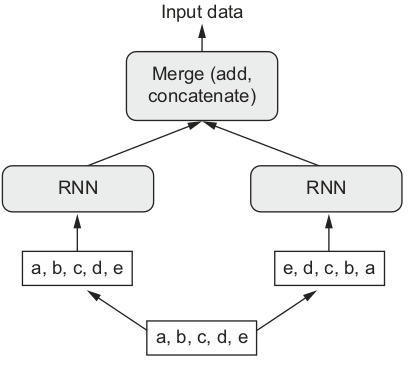

In [24]:
inputs = keras.Input(shape=(sequence_length, 2))
x = layers.Bidirectional(layers.LSTM(16))(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("btc_b_lstm_bidirectional.model",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=['mae'])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data = val_dataset,
                    callbacks = callbacks)
model = keras.models.load_model("btc_b_lstm_bidirectional.model")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
1/2 [==============>...............] - ETA: 1s - loss: 0.9190 - mae: 0.7484INFO:tensorflow:Assets written to: btc_b_lstm_bidirectional.model/assets


INFO:tensorflow:Assets written to: btc_b_lstm_bidirectional.model/assets


2/2 [==============================] - 5s 4s/step - loss: 0.8809 - mae: 0.7189 - val_loss: 3.4046 - val_mae: 1.8325
Epoch 2/10
2/2 [==============================] - 0s 88ms/step - loss: 0.8721 - mae: 0.7152 - val_loss: 3.4747 - val_mae: 1.8515
Epoch 3/10
2/2 [==============================] - 0s 110ms/step - loss: 0.8668 - mae: 0.7136 - val_loss: 3.5285 - val_mae: 1.8660
Epoch 4/10
2/2 [==============================] - 0s 43ms/step - loss: 0.8629 - mae: 0.7122 - val_loss: 3.5778 - val_mae: 1.8791
Epoch 5/10
2/2 [==============================] - 0s 37ms/step - loss: 0.8599 - mae: 0.7113 - val_loss: 3.6206 - val_mae: 1.8905
Epoch 6/10
2/2 [==============================] - 0s 38ms/step - loss: 0.8575 - mae: 0.7107 - val_loss: 3.6583 - val_mae: 1.9004
Epoch 7/10
2/2 [==============================] - 0s 39ms/step - loss: 0.8557 - mae: 0.7100 - val_loss: 3.6983 - val_mae: 1.9109
Epoch 8/10
2/2 [==============================] - 0s 38ms/step - loss: 0.8539 - mae: 0.7096 - val_loss: 3.727